In [55]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense, LSTM
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from tensorflow.keras.utils import plot_model
import yfinance as yf
from datetime import datetime, timedelta
from tensorflow.keras.models import load_model

In [56]:
stock = input()
end_date = datetime.now()
start_date = end_date - timedelta(days=10 * 365)
df = yf.download(stock, start=start_date, end=end_date-timedelta(1))
print(df)

META
[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2013-07-22   25.990000   26.129999   25.719999   26.049999   26.049999  \
2013-07-23   26.100000   26.299999   25.969999   26.129999   26.129999   
2013-07-24   26.320000   26.530001   26.049999   26.510000   26.510000   
2013-07-25   33.540001   34.880001   32.750000   34.360001   34.360001   
2013-07-26   33.770000   34.730000   33.560001   34.009998   34.009998   
...                ...         ...         ...         ...         ...   
2023-07-12  301.750000  309.450012  300.100006  309.339996  309.339996   
2023-07-13  313.619995  316.239990  310.290009  313.410004  313.410004   
2023-07-14  311.790009  314.880005  307.359985  308.869995  308.869995   
2023-07-17  307.540009  311.709991  304.709991  310.619995  310.619995   
2023-07-18  310.880005  314.200012  30

In [57]:
print("Dataframe Shape:", df.shape)
print("Null Value Present:", df.isnull().values.any())

Dataframe Shape: (2515, 6)
Null Value Present: False


<Axes: xlabel='Date'>

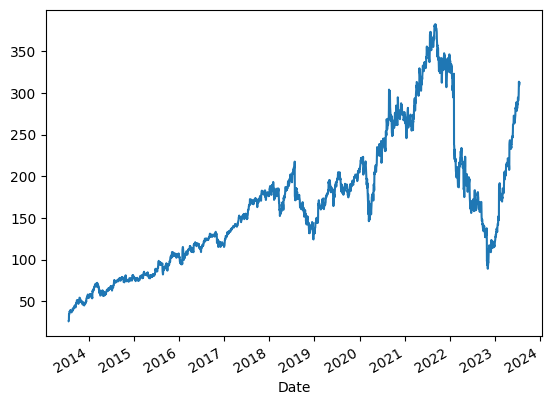

In [58]:
df['Adj Close'].plot()

In [59]:
output_var = pd.DataFrame(df['Adj Close'])
features = ['Open']

In [60]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform = pd.DataFrame(data=feature_transform, columns=features, index=df.index)
feature_transform.head()

,Open
Date,
2013-07-22,0.000000
2013-07-23,0.000309
2013-07-24,0.000928
2013-07-25,0.021226
2013-07-26,0.021873


In [61]:
X_train = feature_transform.values
y_train = output_var.values.ravel()

In [62]:
trainX =np.array(X_train)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])

In [63]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')

In [64]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
315/315 [==============================] - 8s 5ms/step - loss: 32669.1348
Epoch 2/100
315/315 [==============================] - 2s 5ms/step - loss: 29893.4590
Epoch 3/100
315/315 [==============================] - 2s 5ms/step - loss: 26816.1719
Epoch 4/100
315/315 [==============================] - 2s 5ms/step - loss: 24036.5781
Epoch 5/100
315/315 [==============================] - 2s 6ms/step - loss: 21660.6484
Epoch 6/100
315/315 [==============================] - 2s 5ms/step - loss: 19637.8320
Epoch 7/100
315/315 [==============================] - 2s 5ms/step - loss: 17901.0586
Epoch 8/100
315/315 [==============================] - 2s 5ms/step - loss: 16395.4219
Epoch 9/100
315/315 [==============================] - 2s 6ms/step - loss: 15079.7617
Epoch 10/100
315/315 [==============================] - 2s 6ms/step - loss: 13923.5674
Epoch 11/100
315/315 [==============================] - 2s 6ms/step - loss: 12903.8994
Epoch 12/100
315/315 [==============================

315/315 [==============================] - 2s 6ms/step - loss: 135.9810
Epoch 97/100
315/315 [==============================] - 3s 8ms/step - loss: 129.5004
Epoch 98/100
315/315 [==============================] - 2s 7ms/step - loss: 123.4231
Epoch 99/100
315/315 [==============================] - 3s 8ms/step - loss: 117.7227
Epoch 100/100
315/315 [==============================] - 3s 10ms/step - loss: 112.3741


In [65]:
lstm.save(f'{stock}_model.h5')
joblib.dump(scaler, f'{stock}_scaler.joblib')

C:\Users\sahit\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


['META_scaler.joblib']

In [67]:
openp = float(input())
scaledopenp = scaler.fit_transform([[openp]])
scaledopenp = scaledopenp.reshape(1, 1, scaledopenp.shape[1])
expectedclosep = lstm.predict(scaledopenp)
expectedclosep = scaler.inverse_transform(expectedclosep)
print("Expected Close Price:", expectedclosep[0, 0])

4
1/1 [==============================] - 0s 63ms/step
Expected Close Price: 18.879616
